In [1]:
import importlib

import pytorch3d
from pytorch3d.structures import Pointclouds
from pytorch3d import transforms
from scipy.spatial.transform import Rotation as R
import torch
import numpy as np
import copy
import matplotlib.pyplot as plt
# Setup
if torch.cuda.is_available():
    device = torch.device(0)
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")
device

from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVOrthographicCameras, 
    PointsRasterizationSettings,
    PointsRenderer,
    PulsarPointsRenderer,
    PointsRasterizer,
    AlphaCompositor,
    NormWeightedCompositor


)
from chamferdist import ChamferDistance
from pytorch3d.renderer.mesh.shader import HardPhongShader
color_list = [[84, 107, 45], [178, 0, 0], [135, 206, 234]  ,[239, 196, 15]   ,[216, 112, 214]  ,[255, 127, 79]   ,[0, 127, 127]    ,[237, 58, 130]   ,[196, 237, 0]    ,[0, 0, 127]      ,[137, 53, 15]    ,[112, 127, 142]  ,[178, 127, 209]  ,[255, 216, 178]  ,[127, 127, 0]    ,[53, 68, 79]     ,[183, 75, 107],[70, 72, 107],[180, 123, 95],[137, 66, 70]]
color_list_new = []
for c in color_list:
    color_list_new.append([a/255 for a in c])

import jahn_src.slice_util as slice_util

In [30]:
#_part_pcs = torch.from_numpy(np.load("output/9_part_pcs_gt.npz.npy"))[:3,...]
_part_pcs = torch.from_numpy(np.load("output/tensor([ 0, 55, 18], device='cuda:0')_part_pcs.npz.npy"))
_gt_noise = torch.from_numpy(np.load("output/tensor([ 0, 55, 18], device='cuda:0')_gt_noise.npz.npy"))
_noise_center = torch.from_numpy(np.load("output/tensor([ 0, 55, 18], device='cuda:0')_noise_center.npz.npy"))
_pred_noise = torch.from_numpy(np.load("output/tensor([ 0, 55, 18], device='cuda:0')_pred_noise.npz.npy"))
_noisy_trans_and_rots = torch.from_numpy(np.load("output/tensor([ 0, 55, 18], device='cuda:0')_noisy_trans_and_rots.npz.npy"))
print(_part_pcs.shape)
print(_gt_noise.shape)
print(_noise_center.shape)
print(_pred_noise.shape)
print(_noisy_trans_and_rots.shape)

torch.Size([3, 20, 1000, 3])
torch.Size([3, 20, 7])
torch.Size([3, 20, 3])
torch.Size([3, 20, 7])
torch.Size([3, 20, 7])


In [74]:
import jahn_src.slice_util as slice_util
importlib.reload(slice_util)
import jahn_src.slice_util as slice_util

_top_pc_list, _bottom_pc_list  = slice_util.top_bottom_pcs(_part_pcs, max_num_of_pcs = 100)
print(_top_pc_list[0][0].shape)
print(_noisy_trans_and_rots[0,0,...,3:])
_top_pc_list_rotated, _centroid, rot_quat = slice_util.rotate_pc(_top_pc_list,_noisy_trans_and_rots[...,3:])
_top_pc_list_rotated, _trans = slice_util.trans_pc(_top_pc_list_rotated,_noisy_trans_and_rots[...,:3])

#_top_pc_list_rotated, _centroid, rot_quat = slice_util.rotate_pc(_top_pc_list,_pred_noise[...,3:])


print(_top_pc_list_rotated[0][0].shape)
#print(_centroid[0][0])
#print(rot_quat[0][0])
                    

torch.Size([100, 3])
tensor([0.4454, 0.0000, 0.8953, 0.0000])
torch.Size([100, 3])


In [50]:

_centroid

tensor([[[[-0.1848,  0.3838, -0.8048],
          [-0.1848,  0.3838, -0.8048],
          [-0.1848,  0.3838, -0.8048],
          ...,
          [-0.1848,  0.3838, -0.8048],
          [-0.1848,  0.3838, -0.8048],
          [-0.1848,  0.3838, -0.8048]],

         [[-0.7134, -0.1612, -0.2243],
          [-0.7134, -0.1612, -0.2243],
          [-0.7134, -0.1612, -0.2243],
          ...,
          [-0.7134, -0.1612, -0.2243],
          [-0.7134, -0.1612, -0.2243],
          [-0.7134, -0.1612, -0.2243]],

         [[-0.3431,  0.0352, -0.6469],
          [-0.3431,  0.0352, -0.6469],
          [-0.3431,  0.0352, -0.6469],
          ...,
          [-0.3431,  0.0352, -0.6469],
          [-0.3431,  0.0352, -0.6469],
          [-0.3431,  0.0352, -0.6469]],

         ...,

         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0

In [95]:
import jahn_src.slice_util as slice_util
importlib.reload(slice_util)
from jahn_src.slice_util import slice_util
_dir_list = []
_dir_list.append('/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_0')
_dir_list.append('/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_1')
output_dir = 'output'
_obj_list = combine_obj_files(_dir_list,output_dir)
_top_pc_list_batch, _bottom_pc_list_batch  = top_bottom_pcs(_obj_list, max_num_of_pcs = 100)
print(_top_pc_list_batch.shape)
print(_bottom_pc_list_batch.shape)

/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_0/piece_0.obj
torch.Size([6301, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_0/piece_1.obj
torch.Size([10061, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_0/piece_2.obj
torch.Size([8819, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_0/piece_3.obj
torch.Size([3563, 3])


/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_1/piece_0.obj
torch.Size([5097, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_1/piece_1.obj
torch.Size([9034, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_1/piece_2.obj
torch.Size([10086, 3])
/data/jhahn/data/shape_dataset/data/shape/vase/0/fractured_1/piece_3.obj
torch.Size([5082, 3])
_top_pc_list torch.Size([1, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list torch.Size([2, 100, 3])
_top_pc_list torch.Size([2, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list torch.Size([3, 100, 3])
_top_pc_list torch.Size([3, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list torch.Size([4, 100, 3])
_top_pc_list torch.Size([1, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list torch.Size([2, 100, 3])
_top_pc_list torch.Size([2, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list torch.Size([3, 100, 3])
_top_pc_list torch.Size([3, 100, 3])
_top_pcs torch.Size([1, 100, 3])
_top_pc_list t

In [98]:
print(chamferDist(_top_pc_list_batch[0][0].unsqueeze(dim=0), _bottom_pc_list_batch[0][1].unsqueeze(dim=0)))


tensor(0.0703)


In [105]:

verts = []
rgbs = []

for part_id, part_pcs in enumerate(_top_pc_list_batch[0]):
    #part_pcs =  torch.from_numpy(part_pcs)
    verts.extend(part_pcs)
    rgbs.extend([color_list_new[part_id] for _ in range(len(part_pcs))])

verts = torch.Tensor(np.array(verts)).to(device)
rgbs = torch.Tensor(rgbs).to(device)
point_cloud = Pointclouds(points=[verts], features=[rgbs])

print(torch.min(point_cloud.points_list()[0], axis=0))
print(torch.max(point_cloud.points_list()[0], axis=0))
print(torch.min(point_cloud.features_list()[0], axis=0))
print(torch.max(point_cloud.features_list()[0], axis=0))
#torch.max(point_cloud.points_list()[0])

torch.return_types.min(
values=tensor([0.2649, 0.5281, 0.1666], device='cuda:0'),
indices=tensor([202,   1, 293], device='cuda:0'))
torch.return_types.max(
values=tensor([1.0095, 1.2639, 0.7070], device='cuda:0'),
indices=tensor([  1, 310, 100], device='cuda:0'))
torch.return_types.min(
values=tensor([0.3294, 0.0000, 0.0000], device='cuda:0'),
indices=tensor([  0, 100, 100], device='cuda:0'))
torch.return_types.max(
values=tensor([0.9373, 0.8078, 0.9176], device='cuda:0'),
indices=tensor([300, 200, 200], device='cuda:0'))


In [109]:

'''
    dist: distance of the camera from the object
    elev: angle in degrees or radians. This is the angle between the
        vector from the object to the camera, and the horizontal plane y = 0 (xz-plane).
    azim: angle in degrees or radians. The vector from the object to
        the camera is projected onto a horizontal plane y = 0. azim is the angle between the projected vector and a reference vector at (0, 0, 1) on the reference plane (the horizontal plane).
    dist, elev and azim can be of shape (1), (N).
    degrees: boolean flag to indicate if the elevation and azimuth
        angles are specified in degrees or radians.
    eye: the position of the camera(s) in world coordinates. If eye is not
        None, it will override the camera position derived from dist, elev, azim.
    up: the direction of the x axis in the world coordinate system.
    at: the position of the object(s) in world coordinates. eye, up and at can be of shape (1, 3) or (N, 3).
'''

# Initialize a camera.
#R, T = look_at_view_transform(20, 10, 0)
R, T = look_at_view_transform(dist=1.0, elev=0,azim=45)
#An azimuth is the horizontal angle from a cardinal direction, most commonly north


print(R)
print(T)
#T = torch.from_numpy(np.array([0.5,-0.5,0.5])).unsqueeze(0)
cameras = FoVOrthographicCameras(device=device, max_y=1.5,  min_y=-1.0, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. Refer to raster_points.py for explanations of these parameters. 
raster_settings = PointsRasterizationSettings(
    image_size=512, 
    radius = 0.002,
    points_per_pixel = 100
)


# Create a points renderer by compositing points using an alpha compositor (nearer points
# are weighted more heavily). See [1] for an explanation.
rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
renderer = PointsRenderer(
    rasterizer=rasterizer
    ,compositor=AlphaCompositor()
    #,shader=HardPhongShader(device=device, cameras=cameras)
)

tensor([[[-0.7071,  0.0000, -0.7071],
         [ 0.0000,  1.0000,  0.0000],
         [ 0.7071,  0.0000, -0.7071]]])
tensor([[-0., -0., 1.]])


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

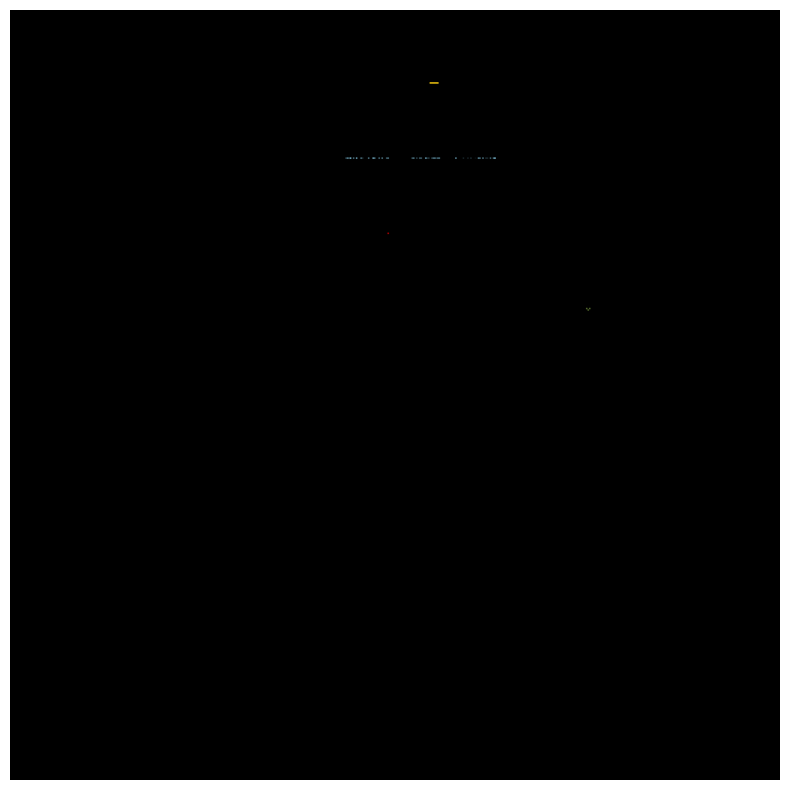

In [110]:
images = renderer(point_cloud)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")

In [29]:
for part_pcs in _pc_list:
    rot_mat = R.random().as_matrix()
    #print('rot_mat')
    #print(rot_mat)
    part_pcs = (rot_mat @ part_pcs.T).T
    #print('pc')
    #print(pc.shape)
    noise_quat = R.from_matrix(rot_mat.T).as_quat()
    noise_quat = torch.from_numpy(noise_quat)
    part_pcs = torch.from_numpy(part_pcs)
    #print('quat_gt')
    #print(quat_gt)
    # we use scalar-first quaternion
    noise_quat = noise_quat[[3, 0, 1, 2]]
    noise_quat[1] = 0.0
    noise_quat[3] = 0.0
    print(noise_quat)
    print(part_pcs)
    #noise_quat = noise_params[..., 3:]
    #noise_quat = noise_quat / noise_quat.norm(dim=-1, keepdim=True)
    part_pcs = transforms.quaternion_apply(noise_quat, part_pcs)



tensor([-0.0854,  0.0000, -0.5219,  0.0000], dtype=torch.float64)
tensor([[-0.7427, -0.3662, -0.3038],
        [-0.7396, -0.3662, -0.3060],
        [-0.7429, -0.3697, -0.3074],
        ...,
        [-0.6374, -1.1431,  0.0531],
        [-0.6491, -1.1416,  0.0531],
        [-0.6607, -1.1419,  0.0541]], dtype=torch.float64)
tensor([-0.0989,  0.0000,  0.8128,  0.0000], dtype=torch.float64)
tensor([[ 0.9968,  0.6146, -0.1127],
        [ 0.9914,  0.6164, -0.1152],
        [ 0.9961,  0.6104, -0.1177],
        ...,
        [ 1.0172,  0.7984, -0.5372],
        [ 1.0186,  0.8099, -0.5347],
        [ 1.0200,  0.8198, -0.5284]], dtype=torch.float64)
tensor([ 0.1705,  0.0000, -0.6290,  0.0000], dtype=torch.float64)
tensor([[-0.1495, -0.0723, -0.7508],
        [-0.1550, -0.0665, -0.7599],
        [-0.1601, -0.0678, -0.7565],
        ...,
        [-0.3772, -0.9073, -0.8405],
        [-0.3722, -0.9081, -0.8384],
        [-0.3799, -0.9067, -0.8417]], dtype=torch.float64)
tensor([0.2313, 0.0000, 0.8447,